<a href="https://colab.research.google.com/github/masona11/Gamma-Hadron-Classification/blob/main/Gamma-Hadron-Classification%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The data set was generated by a Monte Carlo program, Corsika, described in:

    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,

    Forschungszentrum Karlsruhe FZKA 6019 (1998).

http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68


In [34]:
cols = ("fLength", "fWidth", "fsize", "fConc", "fConc1", "fAsym", "fm3Long", "fm3Trans", "fAlpha", "fDist", "class" )
df = pd.read_csv('magic04.data', names = cols)
df.head()

,fLength,fWidth,fsize,fConc,fConc1,fAsym,fm3Long,fm3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In our dataset, the class labels are represented by the strings "g" for gamma and "h" for hadron. Most machine learning algorithms, however, require numerical inputs to work effectively. To prepare our data for modeling, we need to convert these string labels into a numerical format.

The code df["class"] = (df["class"] == "g").astype(int) performs this conversion by leveraging Boolean indexing and type casting:

1) (df["class"] == "g") creates a Boolean Series where each entry is True if the corresponding entry in the 'class' column is "g", and False otherwise.

2) .astype(int) then converts this Series of Booleans into integers, with True becoming 1 and False becoming 0.

After this operation, our 'class' column will consist of 1s for gamma rays and 0s for hadrons, which is a format suitable for use in machine learning algorithms.

In [35]:
df["class"] = (df["class"] == "g").astype(int)

Now we can can check our code to ensure it worked by looking at the first 5 rows.

In [39]:
df.head()

,fLength,fWidth,fsize,fConc,fConc1,fAsym,fm3Long,fm3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


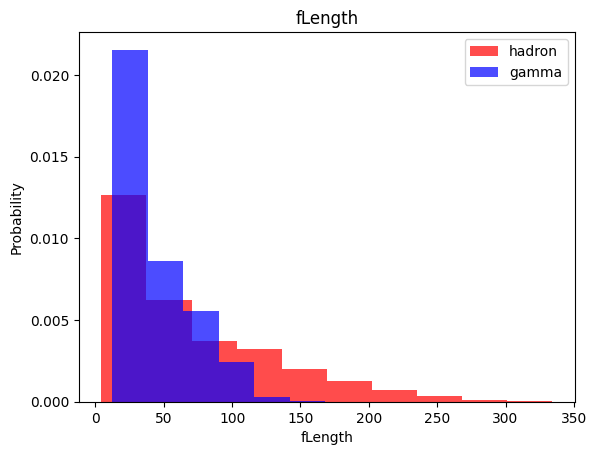

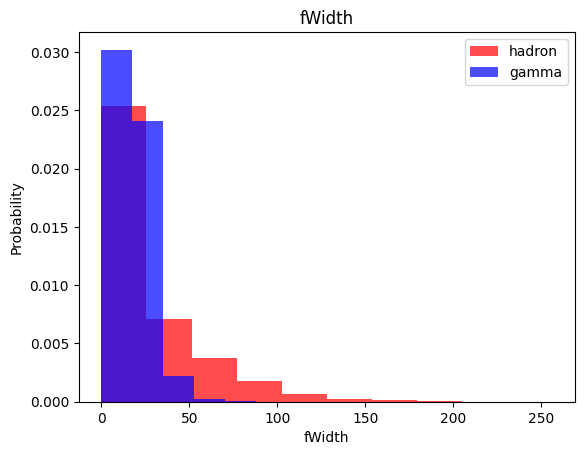

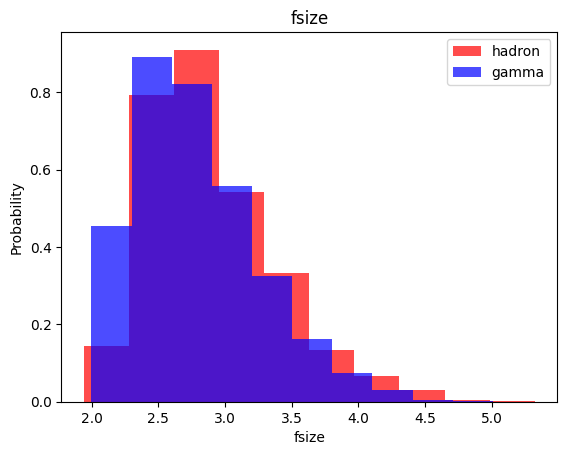

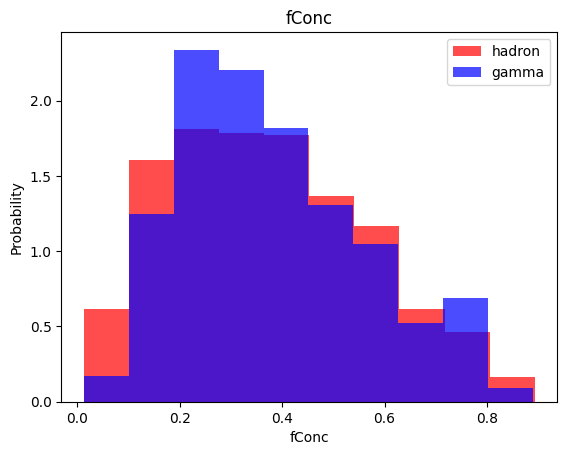

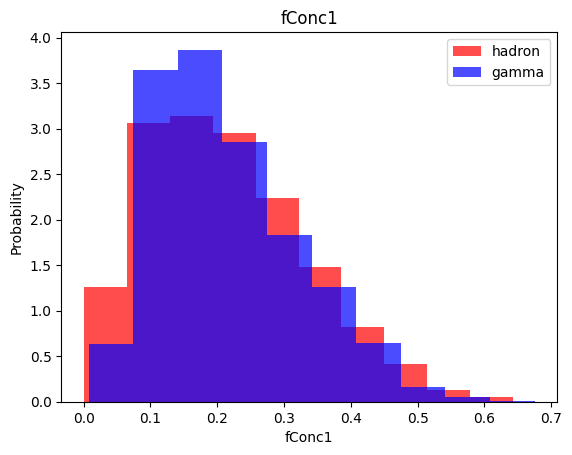

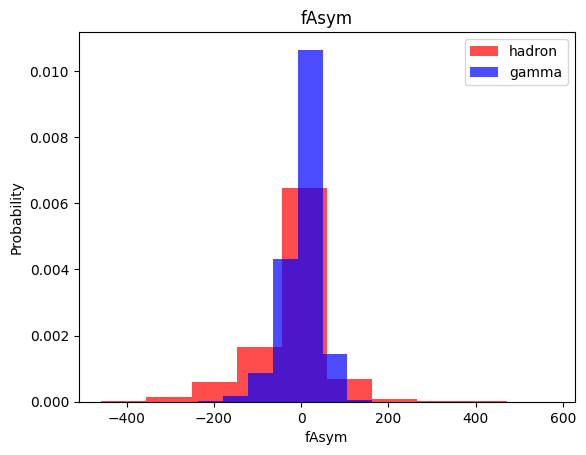

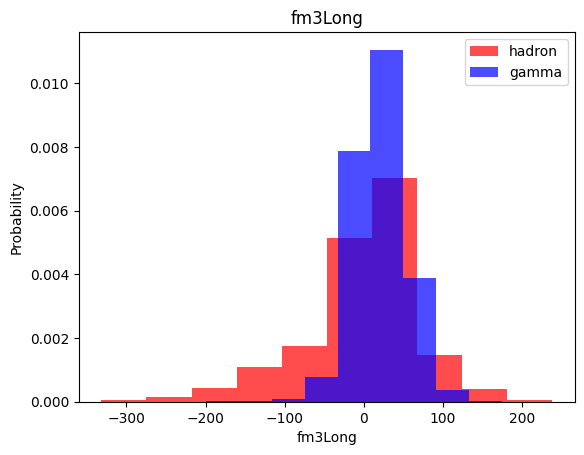

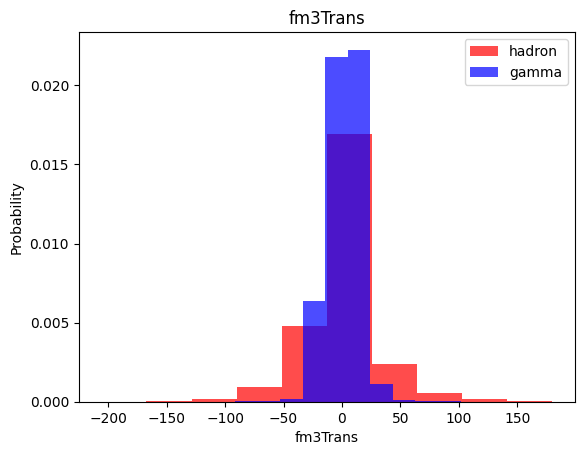

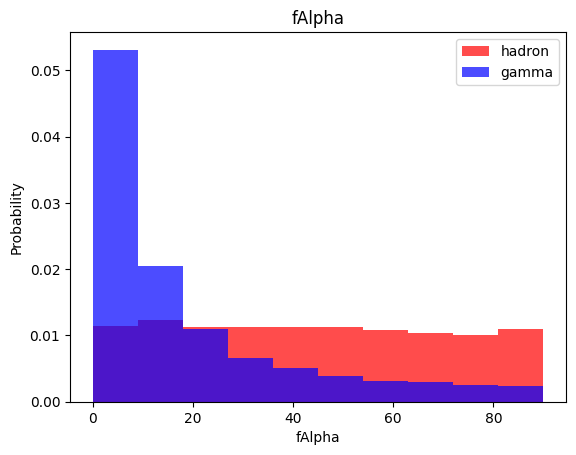

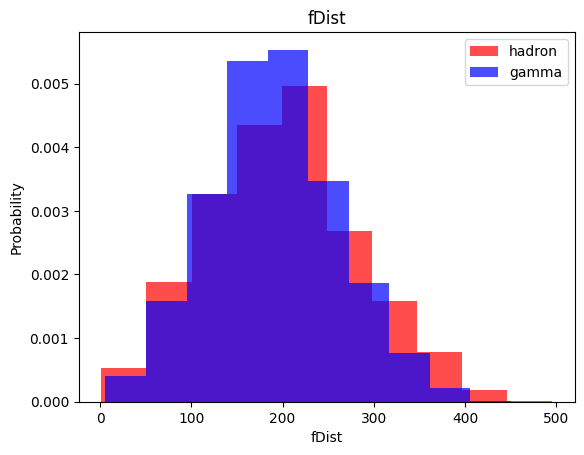

In [40]:
# Looping through each feature in our dataset except the 'class' label
for label in cols[:-1]:
    # Plot histograms for the 'hadron' class (encoded as 0) using red bars
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)

    # Plot histograms for the 'gamma' class (encoded as 1) using blue bars
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)

    # Add a title to each histogram, which is the name of the feature (label)
    plt.title(label)

    # Label the y-axis as 'Probability' to reflect the density=True parameter,
    # which shows the probability density instead of the raw count
    plt.ylabel("Probability")

    # Label the x-axis with the name of the current feature (label)
    plt.xlabel(label)

    # Display a legend to identify which color corresponds to which class label
    plt.legend()

    # Show the plot on the screen
    plt.show()

Summary of Feature Distribution Analysis

We have now visualized the distributions of various features from our dataset, comparing the classes 'gamma' and 'hadron'. These histograms have given us insights into how the features differ between the two classes and have highlighted several key observations:

* Some features show a distinct separation between the classes, such as fSize and fConc, where 'gamma' tends to have lower values, suggesting these features may be strong predictors for classifying new observations.
Other features, like fAsym and fm3Trans, show different distribution patterns between 'gamma' and 'hadron', indicating potential usefulness in distinguishing between the classes.
The density=True parameter in our histograms has allowed us to compare the probability distributions of each feature across the two classes, irrespective of the number of observations in each class.

The overlap and separation seen in these histograms provide us with preliminary indications of which features might be more informative for a machine learning model to learn from. The next steps in our analysis will involve:

* Statistical Testing: Conducting statistical tests to quantitatively assess the differences in distributions for each feature between 'gamma' and 'hadron'.
Feature Selection: Using the insights gained from both visual and statistical analysis to select a subset of features that are most likely to improve the performance of our machine learning model.
Model Training: Training a machine learning model on the selected features and evaluating its performance.

By methodically analyzing the feature distributions and preparing our data accordingly, we set the stage for developing a more accurate and robust predictive model.